In [1]:
!uv add matplotlib

Resolved 283 packages in 1ms
Audited 258 packages in 0.18ms


In [4]:
import pandas as pd

In [5]:
file1 = r'C:\Users\user\Desktop\woogawooga\woogawooga_project\dataset\phishing_total.csv'

In [6]:
df1 = pd.read_csv(file1)

In [7]:
df1.head()

,file_name,phishing_type,speaker,text
0,phishing_1368,기관사칭형,0,"그 본인께서 직접 통장 계산한 사실은 없으신 거죠. 네, 그리고 저희가 김성태를 조..."
1,phishing_1368,기관사칭형,1,평소에 안 지인이고 가 직접 통장 계설해서 김상택에게 판매했다고 진수하고 있는데. ...
2,phishing_1368,기관사칭형,1,아니요.
3,phishing_1368,기관사칭형,0,"통장 본인께서 직접 해설해서 판매한 사실 전혀 없으신 거죠, 이 부분도 네, 예, ..."
4,phishing_1368,기관사칭형,1,따로.


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44519 entries, 0 to 44518
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   file_name      44519 non-null  object
 1   phishing_type  44519 non-null  object
 2   speaker        44519 non-null  int64 
 3   text           44519 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [9]:
import pandas as pd
from collections import Counter
import re

# 한글 단어만 추출하는 함수
def extract_keywords(text):
    # 한글 단어만 추출 (띄어쓰기 기준)
    keywords = re.findall(r'\b[가-힣]+\b', text)
    return keywords

# 키워드 빈도수 계산 함수
def keyword_frequency(df, text_column):
    all_keywords = []
    for text in df[text_column]:
        if pd.isnull(text):  # 결측치 방지
            continue
        all_keywords.extend(extract_keywords(str(text)))
    keyword_counts = Counter(all_keywords)
    keyword_freq_df = pd.DataFrame(keyword_counts.items(), columns=['keyword', 'frequency'])
    keyword_freq_df = keyword_freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)
    return keyword_freq_df

# 사용 예시
# keyword_freq_df = keyword_frequency(df1, 'text')
# display(keyword_freq_df.head())


In [12]:
# 사용
keyword_freq_df = keyword_frequency(df1, 'text')

In [13]:
keyword_freq_df["keyword"].nunique()

52753

In [14]:
keyword_freq_df.head(100)

,keyword,frequency
0,네,12057
1,예,6510
2,그,5912
3,지금,5305
4,제가,3658
...,...,...
95,때,508
96,오늘,487
97,확인을,483
98,해야,483


In [19]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')  # 윈도우에서 기본 제공
plt.rcParams['axes.unicode_minus'] = False

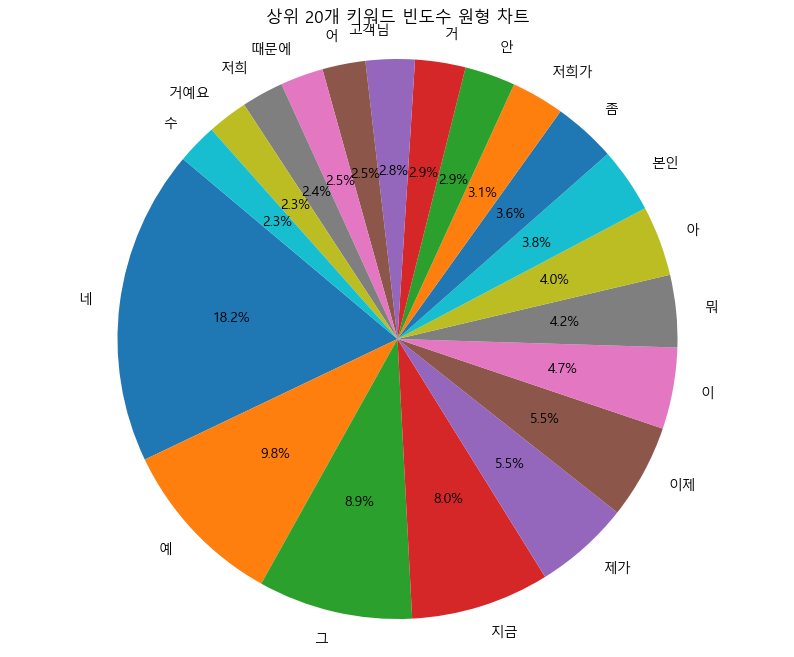

In [24]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt

# 한글 단어만 추출하는 함수
def extract_keywords(text):
    keywords = re.findall(r'\b[가-힣]+\b', text)
    return keywords

# 키워드 빈도수 계산 함수
def keyword_frequency(df, text_column):
    all_keywords = []
    for text in df[text_column]:
        if pd.isnull(text):
            continue
        all_keywords.extend(extract_keywords(str(text)))
    keyword_counts = Counter(all_keywords)
    keyword_freq_df = pd.DataFrame(keyword_counts.items(), columns=['keyword', 'frequency'])
    keyword_freq_df = keyword_freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)
    return keyword_freq_df

# 예시: 데이터프레임(df1)에서 상위 20개 추출
keyword_freq_df = keyword_frequency(df1, 'text')
top_100 = keyword_freq_df.head(20)

# 원형 차트 그리기
plt.figure(figsize=(10, 8))
plt.pie(top_100['frequency'], labels=top_100['keyword'], autopct='%1.1f%%', startangle=140)
plt.title('상위 20개 키워드 빈도수 원형 차트')
plt.axis('equal')
plt.show()
